In [94]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

## Import librairies

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
import mystat
from sklearn.feature_selection import chi2#user  defined module for statistical analysis 

In [3]:
#pip install xgboost

## Data analysis ,Wrangling

In [4]:
train=pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


 Features
* survival : 1=Yes ,0=no
* Pclass  : 1=first ,2=second ,3=third class
* SibSp : no of siblings / spouses aboard
* Parch : no of parents / children aboard the Titanic

In [15]:
test=pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [16]:
sub=pd.read_csv('gender_submission.csv')
sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


###  Overview 

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [33]:
train[train.duplicated()]
# no duplicated rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


Dataset is made of 12 features and 891 entries  having 7 numericals and remaining are categorical
* age,cabin and embarked columns are  counting some null values 

### Stat analysis

In [36]:
mystat.analyse_obj(train) # object features analysis
# high na values in cabin 

,count,unique,top,freq,null values%
Name,891,891,"Braund, Mr. Owen Harris",1,0.0
Sex,891,2,male,577,0.0
Ticket,891,681,347082,7,0.0
Cabin,204,147,B96 B98,4,336.764706
Embarked,889,3,S,644,0.224972


In [18]:
mystat.analyse_num(train)

,count,mean,std,min,Q1,Median,Q3,max,IQR,Variance,null_values%,outliers%,mean_dispersion%,skewness,kurtosis
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000,445.0000,66231.000000,0.000000,0.000000,57.702655,0.000000,-1.200000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000,1.0000,0.236772,0.000000,0.000000,126.770139,0.478523,-1.775005
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000,1.0000,0.699015,0.000000,0.000000,36.214851,-0.630548,-1.280015
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000,17.8750,211.019125,24.789916,1.540616,48.912219,0.389108,0.178274
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000,1.0000,1.216043,0.000000,5.162738,210.846437,3.695352,17.880420
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000,0.0000,0.649728,0.000000,100.000000,211.234407,2.749117,9.778125
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292,23.0896,2469.436846,0.000000,13.019080,154.307253,4.787317,33.398141


### Visualisation

<AxesSubplot:ylabel='Survived'>

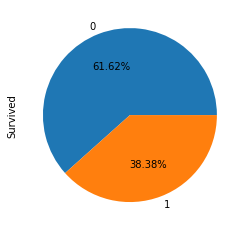

In [51]:
train.Survived.value_counts().plot.pie(autopct='%1.2f%%')

most people perished in the incident as only 40% survided

<AxesSubplot:xlabel='Sex'>

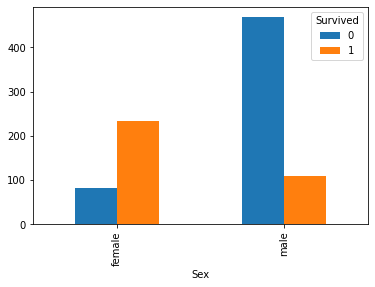

In [67]:
pd.crosstab(train.Sex,train.Survived).plot.bar()

looks like women survived the most 

Text(0, 0.5, 'No of siblings Spouse onboard')

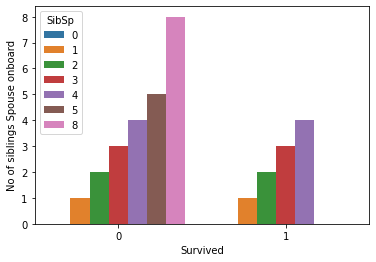

In [72]:
p=sns.barplot(x='Survived',y='SibSp',hue='SibSp',data=train)
p.set_ylabel("No of siblings Spouse onboard", fontsize = 10)

the most siblings you had onbard the higher the chance you had to die 

Text(0, 0.5, 'No of siblings Spouse onboard')

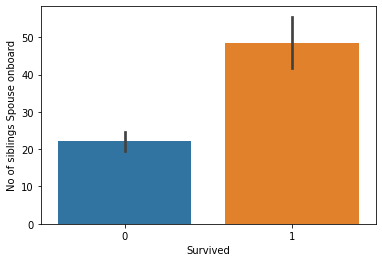

In [77]:
p=sns.barplot(x='Survived',y='Fare',data=train)
p.set_ylabel("Fare", fontsize = 10)

without surprise the highest fare people survived the most

### Wrangling

In [90]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Dealing with na values 

In [93]:
#train['Age']=train['Age'].astype('int') # correcting age dtype

In [79]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [87]:
## remove useless information for training 
trainY=train.Survived
trainX=train.drop(['Passengerid','Survived','Name','','','','','',''])

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64